# Personal Project - Flight Delay - Working Notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import timedelta, datetime
import csv

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import stats, pearsonr, spearmanr, kruskal, levene

from env import user, password, host
import flight_delay_acquire
import flight_delay_prepare
import explore
import scale

In [2]:
# Expanding the columns I can visualize
# pd.set_option('display.max_columns', 500)

In [3]:
# Expanding the rows I can visualize
# pd.options.display.max_rows = 500

# Data Dictionary

|    |   Index | Variable Name        | Variable Description                                                        |
|---:|------------------------:|:------------------|:--------------------------------------------------------------------------|                                
|  2 |                       1 | Year              | 1987-2008                                                                 |
|  3 |                       2 | Month             | 12-Jan                                                                    |
|  4 |                       3 | DayofMonth        | 31-Jan                                                                    |
|  5 |                       4 | DayOfWeek         | 1 (Monday) - 7 (Sunday)                                                   |
|  6 |                       5 | DepTime           | actual departure time (local, hhmm)                                       |
|  7 |                       6 | CRSDepTime        | scheduled departure time (local, hhmm)                                    |
|  8 |                       7 | ArrTime           | actual arrival time (local, hhmm)                                         |
|  9 |                       8 | CRSArrTime        | scheduled arrival time (local, hhmm)                                      |
| 10 |                       9 | UniqueCarrier     | unique carrier code                                                       |
| 11 |                      10 | FlightNum         | flight number                                                             |
| 12 |                      11 | TailNum           | plane tail number                                                         |
| 13 |                      12 | ActualElapsedTime | in minutes                                                                |
| 14 |                      13 | CRSElapsedTime    | in minutes                                                                |
| 15 |                      14 | AirTime           | in minutes                                                                |
| 16 |                      15 | ArrDelay          | arrival delay, in minutes                                                 |
| 17 |                      16 | DepDelay          | departure delay, in minutes                                               |
| 18 |                      17 | Origin            | origin IATA airport code                                                  |
| 19 |                      18 | Dest              | destination IATA airport code                                             |
| 20 |                      19 | Distance          | in miles                                                                  |
| 21 |                      20 | TaxiIn            | taxi in time, in minutes                                                  |
| 22 |                      21 | TaxiOut           | taxi out time in minutes                                                  |
| 23 |                      22 | Cancelled         | was the flight cancelled?                                                 |
| 24 |                      23 | CancellationCode  | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
| 25 |                      24 | Diverted          | 1 = yes, 0 = no                                                           |
| 26 |                      25 | CarrierDelay      | in minutes                                                                |
| 27 |                      26 | WeatherDelay      | in minutes                                                                |
| 28 |                      27 | NASDelay          | in minutes                                                                |
| 29 |                      28 | SecurityDelay     | in minutes                                                                |
| 30 |                      29 | LateAircraftDelay | in minutes                                                                |

# Acquire

In [4]:
# Calling wrangle function from acquire.py
df = flight_delay_acquire.wrangle_flight_delay()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/davidschneemann/codeup/external_data_tap/unzipped_data/2007.csv'

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

# Preparation

In [ ]:
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = flight_delay_prepare.prep_flight_delay(df)

In [ ]:
df.head()

,Month,dayofmonth,weekday,depart,scheduled_depart,arrive,scheduled_arrive,UniqueCarrier,total_time,scheduled_total_time,AirTime,Origin,Distance,TaxiIn,TaxiOut,total_delay,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,1,1,1,1232,1225,1341,1340,WN,69,75,54,SMF,389,4,11,8,-6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1918,1905,2043,2035,WN,85,90,74,SMF,479,5,6,21,-5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,2206,2130,2334,2300,WN,88,90,73,SMF,479,6,9,70,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1230,1200,1356,1330,WN,86,90,75,SMF,479,3,8,56,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,1,831,830,957,1000,WN,86,90,74,SMF,479,3,9,-2,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 56 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Month                 int64 
 1   dayofmonth            int64 
 2   weekday               int64 
 3   depart                int64 
 4   scheduled_depart      int64 
 5   arrive                int64 
 6   scheduled_arrive      int64 
 7   UniqueCarrier         object
 8   total_time            int64 
 9   scheduled_total_time  int64 
 10  AirTime               int64 
 11  Origin                object
 12  Distance              int64 
 13  TaxiIn                int64 
 14  TaxiOut               int64 
 15  total_delay           int64 
 16  total_time_diff       int64 
 17  month_1               uint8 
 18  month_2               uint8 
 19  month_3               uint8 
 20  month_4               uint8 
 21  month_5               uint8 
 22  month_6               uint8 
 23  month_7               uint8 
 24

In [ ]:
df['total_time_diff'] = df['total_time'] - df['scheduled_total_time']

In [ ]:
df.head()

,Year,Month,dayofmonth,weekday,depart,scheduled_depart,arrive,scheduled_arrive,UniqueCarrier,FlightNum,TailNum,total_time,scheduled_total_time,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,N351,69,75,54,1,7,SMF,ONT,389,4,11,0,0,0,0,0,0,0,8,-6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,N370,85,90,74,8,13,SMF,PDX,479,5,6,0,0,0,0,0,0,0,21,-5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,N685,88,90,73,34,36,SMF,PDX,479,6,9,0,0,3,0,0,0,31,70,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,N364,86,90,75,26,30,SMF,PDX,479,3,8,0,0,23,0,0,0,3,56,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831,830,957,1000,WN,2278,N480,86,90,74,-3,1,SMF,PDX,479,3,9,0,0,0,0,0,0,0,-2,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.total_time_diff.value_counts()

-4       321457
-5       319785
-3       316859
-2       307709
-6       306637
-7       291841
-1       290746
 0       281034
-8       271860
 1       256558
-9       249501
 2       235408
-10      226958
 3       213609
-11      200237
 4       191309
-12      177300
 5       175403
-13      155132
 6       154756
 7       137794
-14      134757
 8       123654
-15      117394
 9       110168
 10      100047
-16       99468
 11       87579
-17       85606
 12       78378
-18       72811
 13       70105
 14       62650
-19       61629
 15       56788
-20       52862
 16       50226
 17       45011
-21       44115
 18       40441
-22       37323
 19       36518
 20       33312
-23       31100
 21       29571
 22       26824
-24       26623
 23       24012
-25       22644
 24       22179
 25       20170
-26       18758
 26       17986
 27       16789
-27       15751
 28       15426
 29       13847
-28       13402
 30       13027
 31       12089
-29       11417
 32       11005
 33     

In [ ]:
df.total_time_diff.describe()

count    7.275288e+06
mean    -1.169904e+00
std      1.430847e+01
min     -1.530000e+02
25%     -9.000000e+00
50%     -3.000000e+00
75%      4.000000e+00
max      1.209000e+03
Name: total_time_diff, dtype: float64

# Explore

### Variables to Explore:
**Continuous**
- Month
- dayofmonth
- weekday
- depart
- arrive
- Distance
- scheduled_total_time
- total_time_diff
- 
**Categorical**
- 
- 
- 
- 
- 

In [ ]:
df_sample = df.sample(3000)

<Figure size 432x288 with 0 Axes>

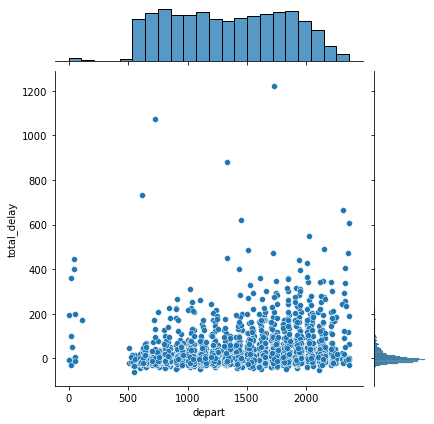

In [ ]:
plt.figure()
sns.jointplot(x='depart', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

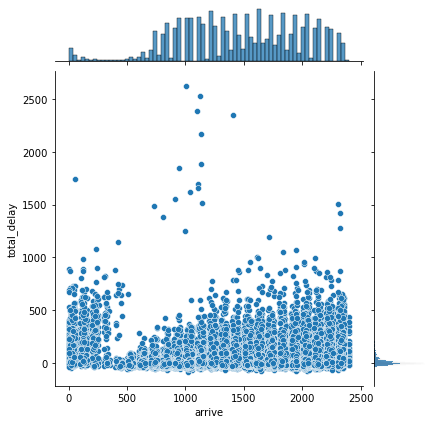

In [ ]:
plt.figure()
sns.jointplot(x='arrive', y='total_delay', data=df.sample(100000), kind='scatter')

<Figure size 432x288 with 0 Axes>

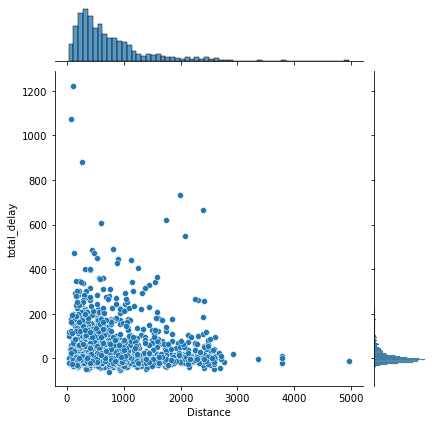

In [ ]:
plt.figure()
sns.jointplot(x='Distance', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

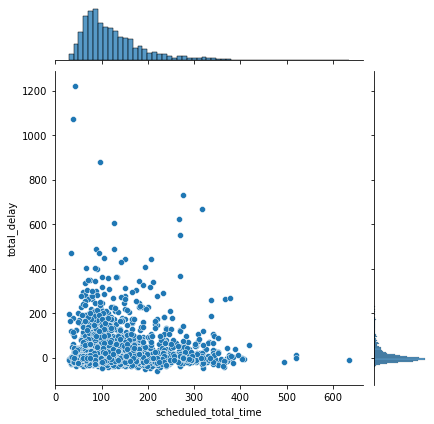

In [ ]:
plt.figure()
sns.jointplot(x='scheduled_total_time', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

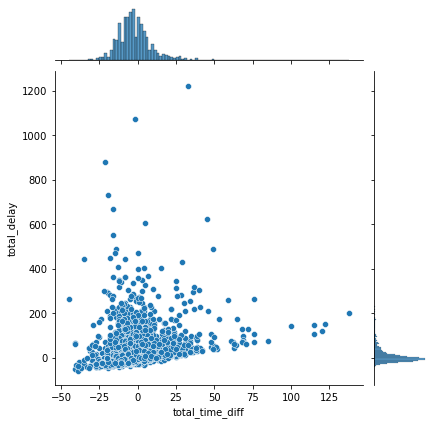

In [ ]:
plt.figure()
sns.jointplot(x='total_time_diff', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

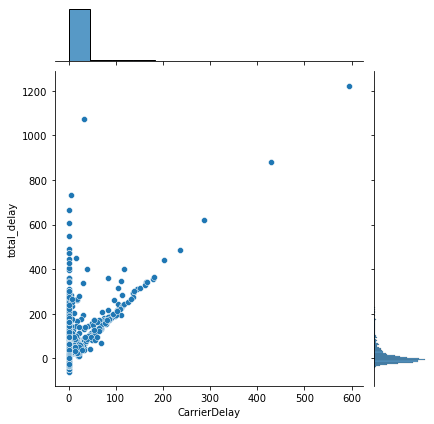

In [ ]:
plt.figure()
sns.jointplot(x='CarrierDelay', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

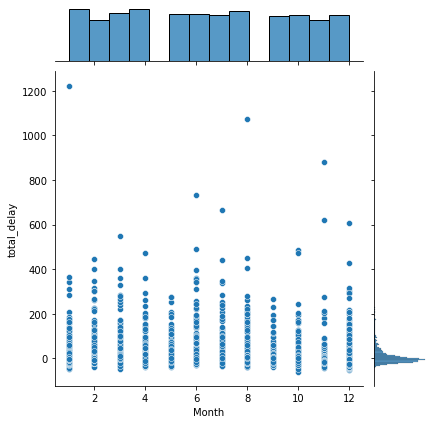

In [ ]:
plt.figure()
sns.jointplot(x='Month', y='total_delay', data=df_sample, kind='scatter')

In [ ]:
df.CarrierDelay.value_counts()

0       6460366
15        28492
6         26084
7         24544
16        23999
         ...   
803           1
1093          1
977           1
976           1
542           1
Name: CarrierDelay, Length: 1045, dtype: int64

In [ ]:
df.CarrierDelay.describe()

count    7.275288e+06
mean     3.959765e+00
std      2.108686e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.580000e+03
Name: CarrierDelay, dtype: float64

In [ ]:
df.Origin.value_counts()

ATL    406136
ORD    358462
DFW    287373
DEN    236667
LAX    233940
PHX    208203
IAH    197869
LAS    181402
DTW    173020
MSP    151966
EWR    147842
SLC    146332
SFO    135609
MCO    128286
CLT    124650
BOS    123677
JFK    122035
LGA    116197
CVG    107861
SEA    107797
BWI    107473
PHL    101296
SAN     95938
MDW     94334
IAD     87948
DCA     86172
MEM     83239
TPA     78894
CLE     76679
OAK     73871
FLL     68473
HNL     67151
RDU     65569
MIA     63713
MCI     63702
STL     63426
SJC     60959
BNA     59935
PDX     58074
SMF     57423
HOU     55486
DAL     52832
SNA     51909
AUS     50617
PIT     47968
SAT     45542
IND     42454
ONT     41109
ABQ     40688
CMH     37519
MSY     36872
JAX     35364
BUR     32214
BDL     31790
PBI     29290
TUS     27827
MKE     27516
OMA     27410
RSW     27289
RNO     26968
OKC     26184
BUF     25944
OGG     25282
PVD     24666
TUL     24401
SJU     23332
BHM     23020
SDF     21743
ELP     21529
MHT     20839
ORF     19484
ANC   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 69 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Year                  int64 
 1   Month                 int64 
 2   dayofmonth            int64 
 3   weekday               int64 
 4   depart                int64 
 5   scheduled_depart      int64 
 6   arrive                int64 
 7   scheduled_arrive      int64 
 8   UniqueCarrier         object
 9   FlightNum             int64 
 10  TailNum               object
 11  total_time            int64 
 12  scheduled_total_time  int64 
 13  AirTime               int64 
 14  ArrDelay              int64 
 15  DepDelay              int64 
 16  Origin                object
 17  Dest                  object
 18  Distance              int64 
 19  TaxiIn                int64 
 20  TaxiOut               int64 
 21  Cancelled             int64 
 22  Diverted              int64 
 23  CarrierDelay          int64 
 24

In [ ]:
df.head()

,Year,Month,dayofmonth,weekday,depart,scheduled_depart,arrive,scheduled_arrive,UniqueCarrier,FlightNum,TailNum,total_time,scheduled_total_time,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,N351,69,75,54,1,7,SMF,ONT,389,4,11,0,0,0,0,0,0,0,8,-6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,N370,85,90,74,8,13,SMF,PDX,479,5,6,0,0,0,0,0,0,0,21,-5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,N685,88,90,73,34,36,SMF,PDX,479,6,9,0,0,3,0,0,0,31,70,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,N364,86,90,75,26,30,SMF,PDX,479,3,8,0,0,23,0,0,0,3,56,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831,830,957,1000,WN,2278,N480,86,90,74,-3,1,SMF,PDX,479,3,9,0,0,0,0,0,0,0,-2,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['Bin_Carrier_Delay'] = pd.cut(x=df['CarrierDelay'], bins = [0, 5, 15, 30, 45, 60, 75, 90, 120, 180, 240, 2590], include_lowest = True)

In [ ]:
pd.crosstab(df['UniqueCarrier'],df['Bin_Carrier_Delay'])

Bin_Carrier_Delay,"(-0.001, 5.0]","(5.0, 15.0]","(15.0, 30.0]","(30.0, 45.0]","(45.0, 60.0]","(60.0, 75.0]","(75.0, 90.0]","(90.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 2590.0]"
UniqueCarrier,,,,,,,,,,,
9E,231123,3478,5404,2849,1802,1354,939,1249,1098,392,498
AA,551915,19242,18037,8042,4734,3142,2111,2654,2211,819,929
AQ,44100,292,803,276,176,91,59,66,46,24,24
AS,140174,4925,5147,2305,1333,882,548,727,612,242,228
B6,171040,7131,4331,1593,863,552,342,468,430,170,196
CO,297014,7810,6579,2570,1367,888,601,823,826,324,336
DL,430077,12721,11838,4722,2550,1565,1087,1417,1323,498,525
EV,224014,8389,16528,8416,5164,3448,2493,3110,2996,1068,991
F9,88344,3893,2859,844,393,225,133,222,188,77,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 70 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Year                  int64   
 1   Month                 int64   
 2   dayofmonth            int64   
 3   weekday               int64   
 4   depart                int64   
 5   scheduled_depart      int64   
 6   arrive                int64   
 7   scheduled_arrive      int64   
 8   UniqueCarrier         object  
 9   FlightNum             int64   
 10  TailNum               object  
 11  total_time            int64   
 12  scheduled_total_time  int64   
 13  AirTime               int64   
 14  ArrDelay              int64   
 15  DepDelay              int64   
 16  Origin                object  
 17  Dest                  object  
 18  Distance              int64   
 19  TaxiIn                int64   
 20  TaxiOut               int64   
 21  Cancelled             int64   
 22  Diverted          

In [ ]:
df.UniqueCarrier.value_counts()

WN    1156958
AA     613836
OO     582871
MQ     516205
UA     477090
US     475583
DL     468323
XE     422305
NW     405872
CO     319138
YV     282585
EV     276617
FL     259869
9E     250186
OH     224471
B6     187116
AS     157123
F9      97248
HA      55935
AQ      45957
Name: UniqueCarrier, dtype: int64

In [ ]:
cat_cols = ['UniqueCarrier', 'Origin', 'CarrierDelay', 'dayofmonth', 'weekday']
cont_cols = ['total_delay', 'Distance', 'total_time_diff']

In [ ]:
# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

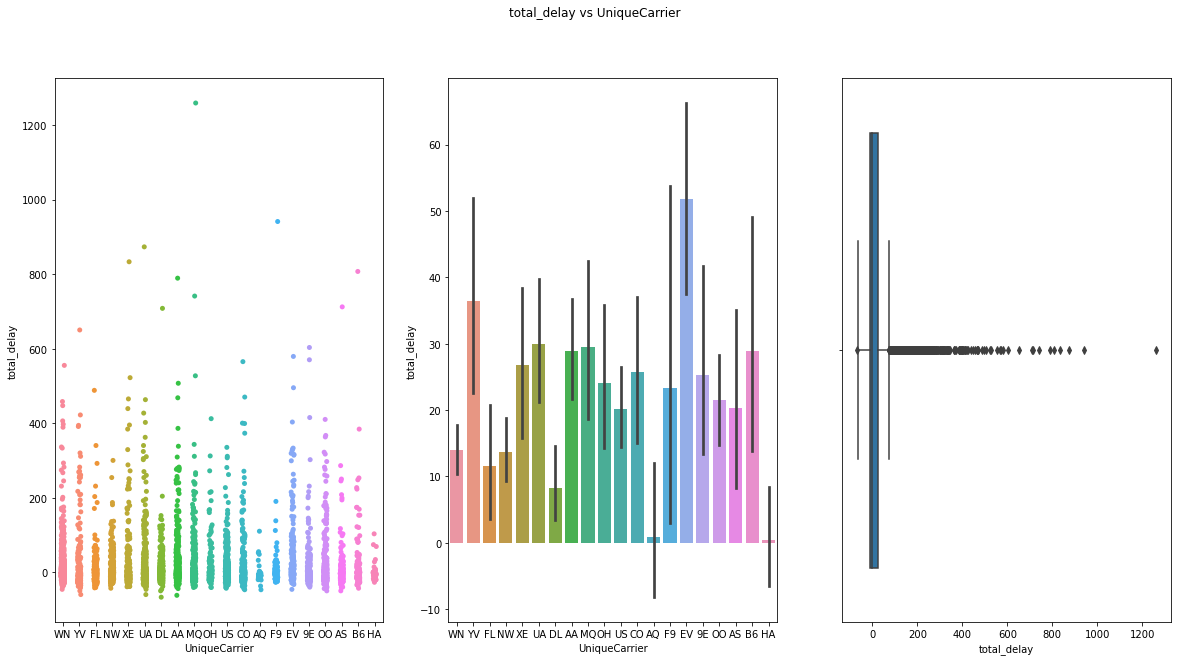

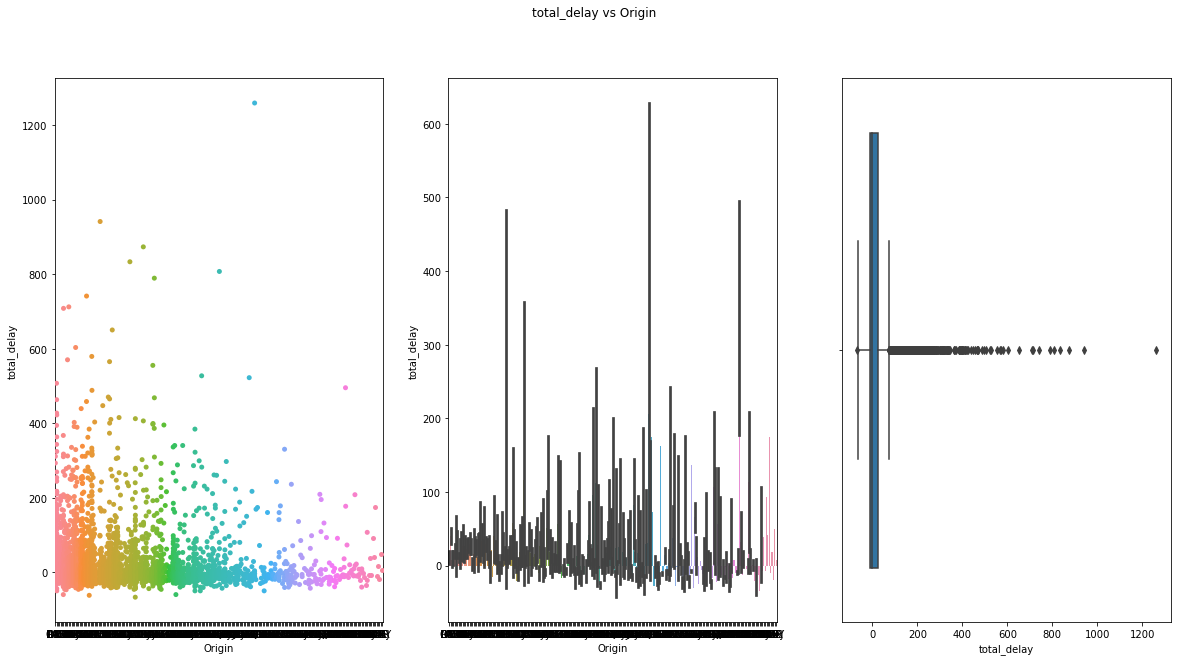

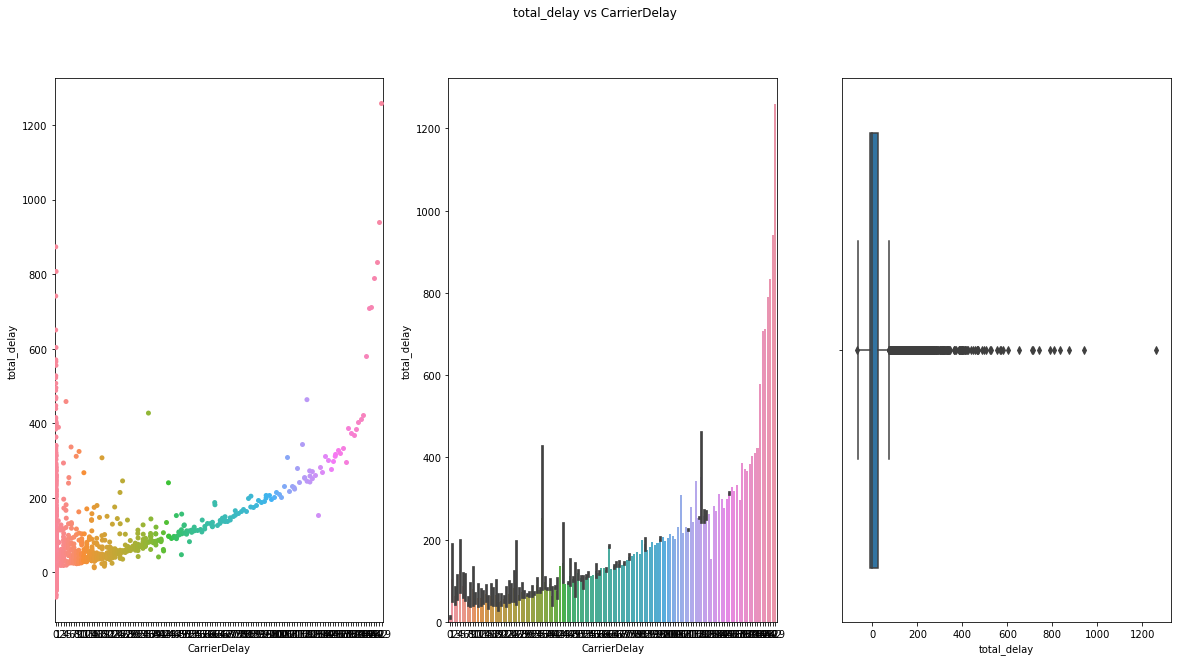

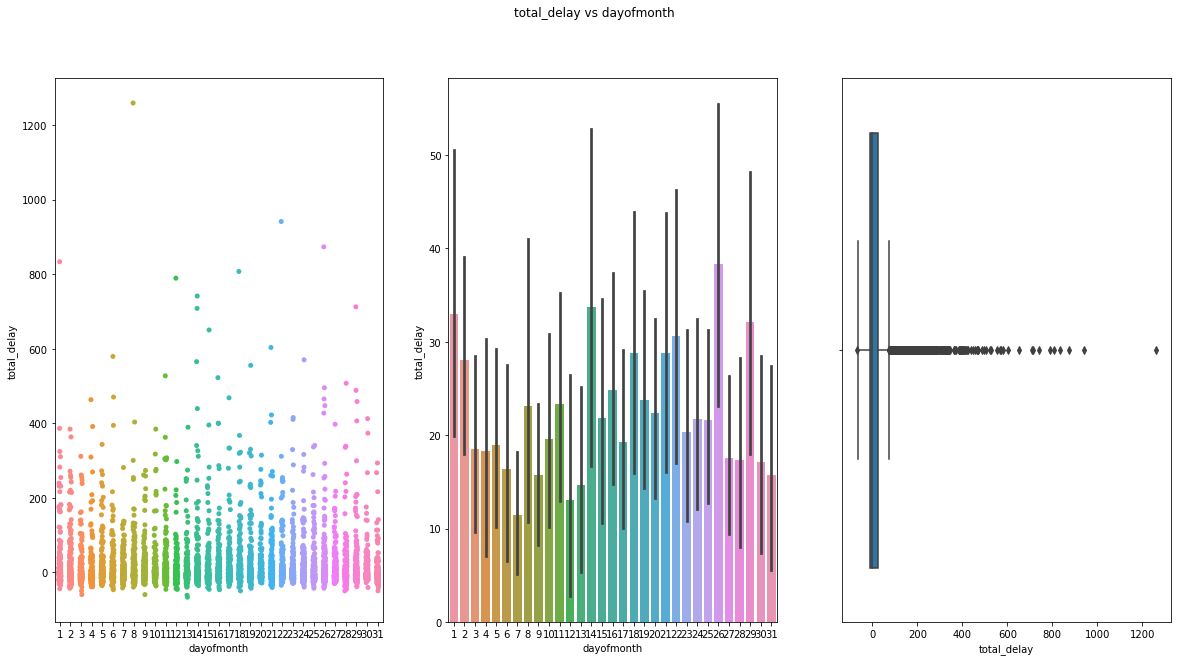

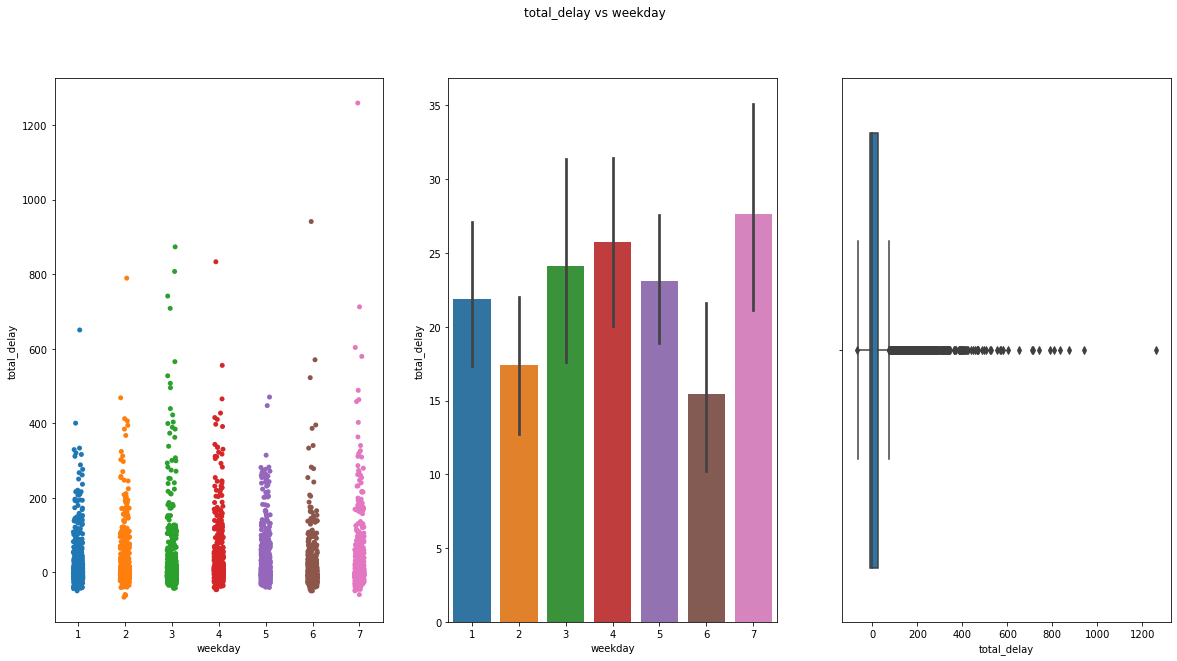

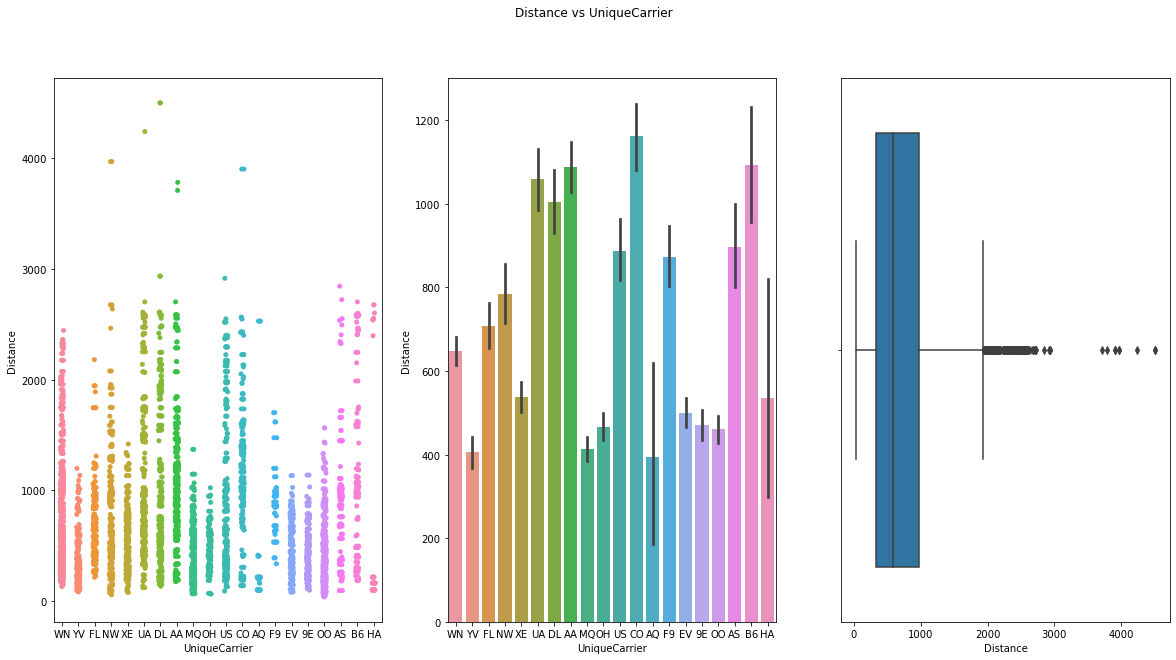

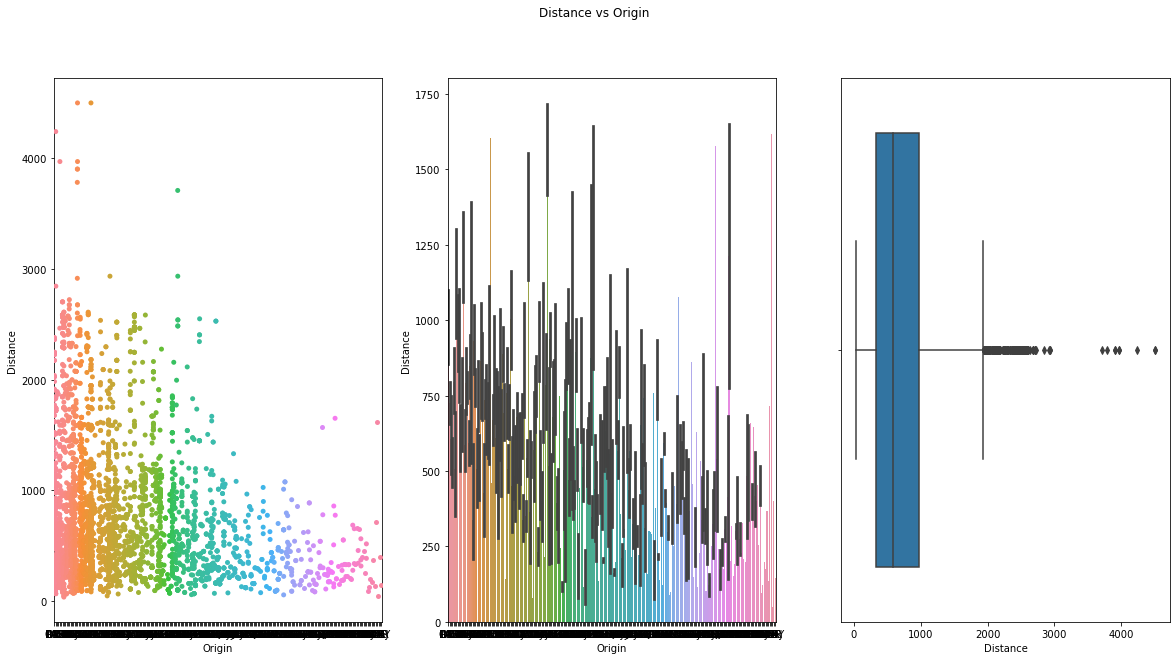

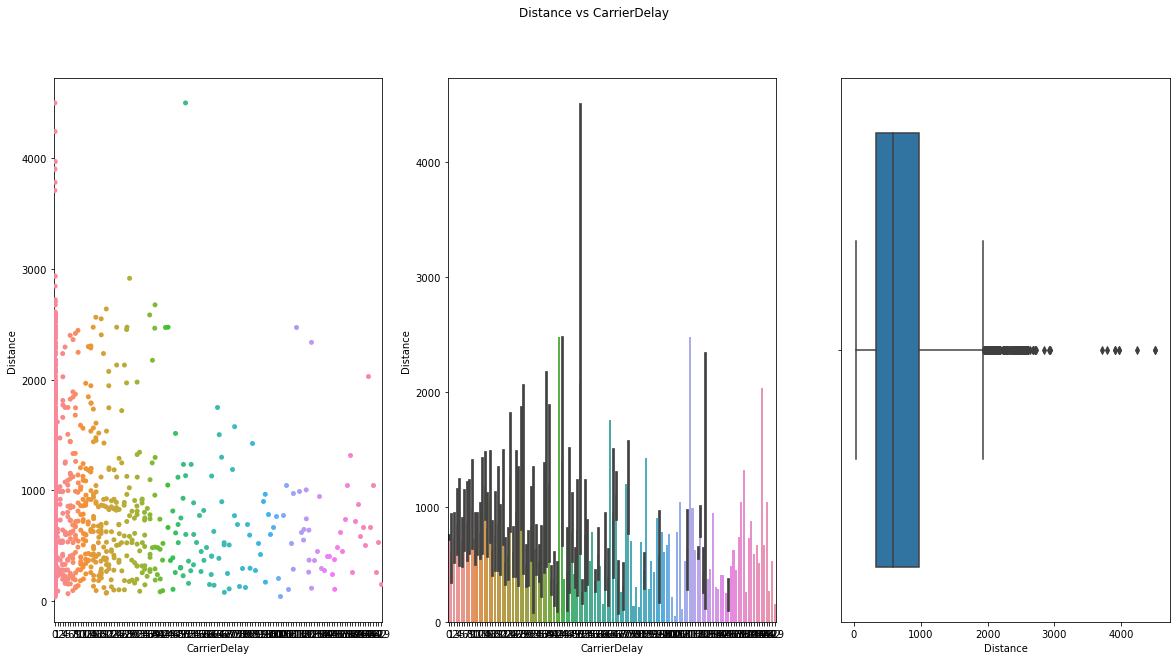

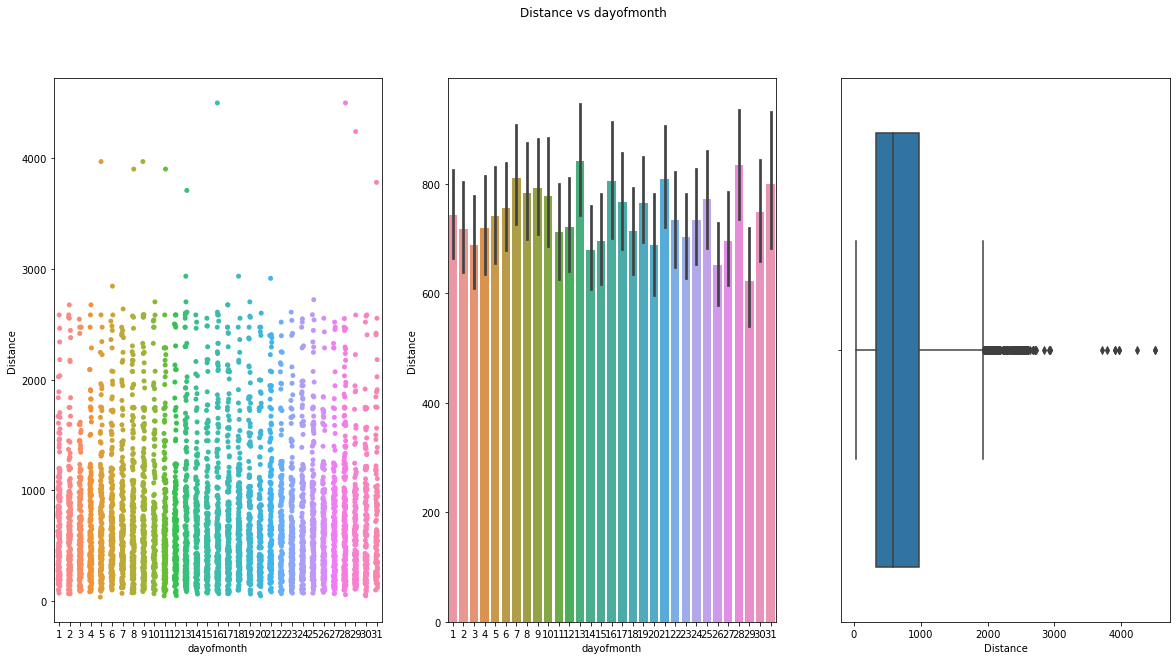

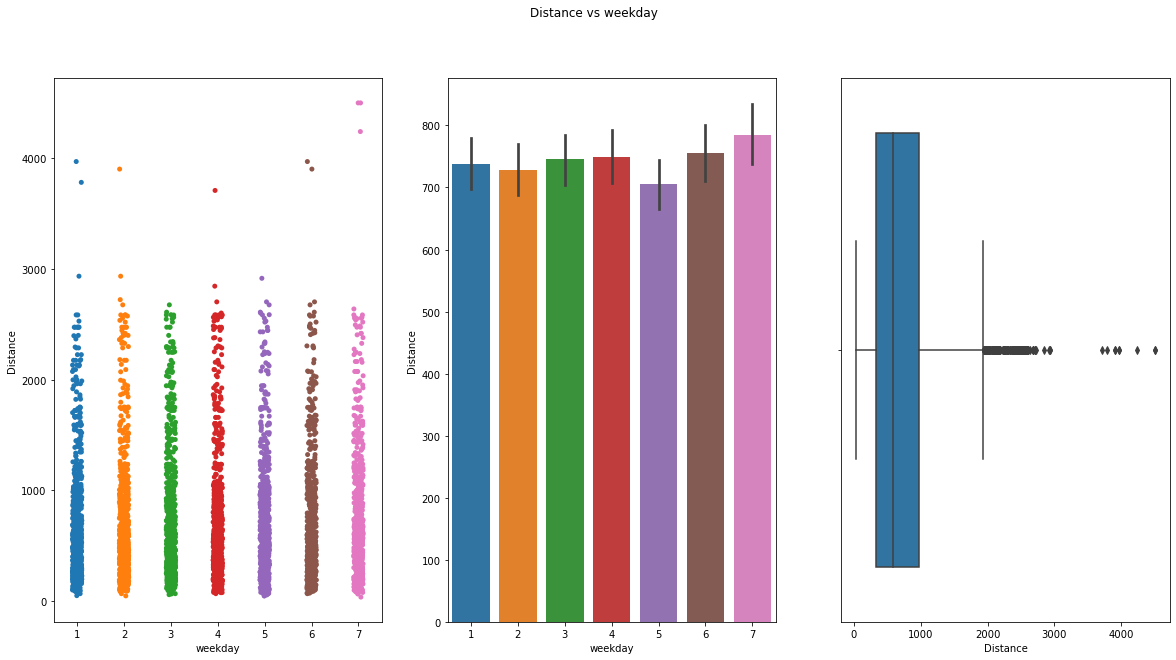

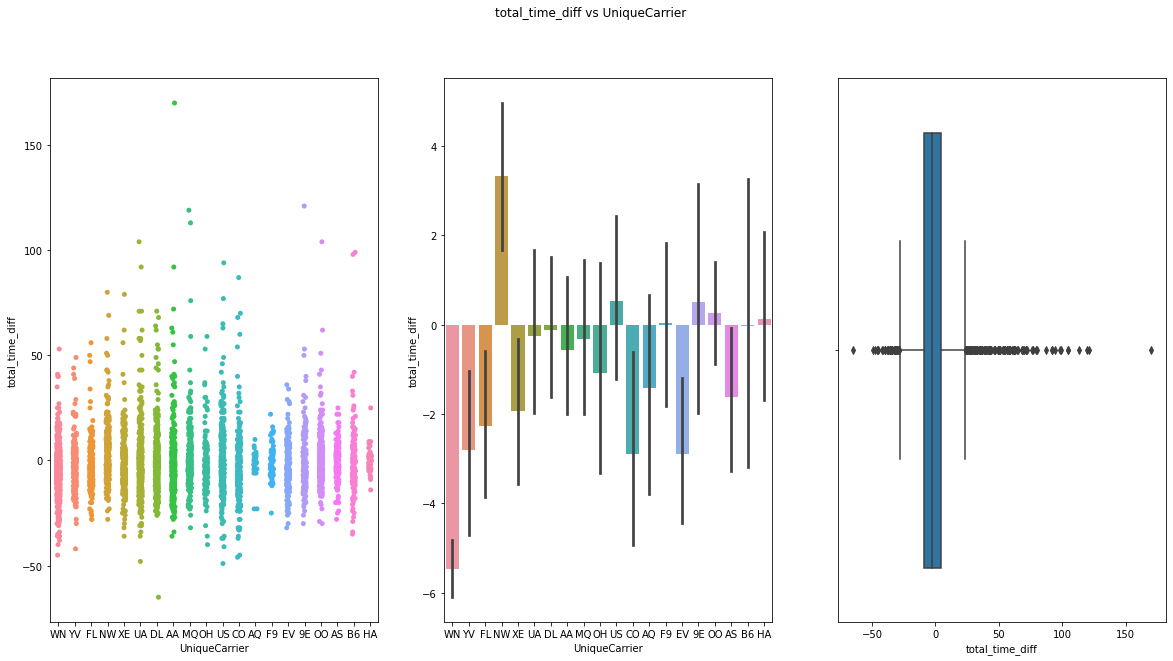

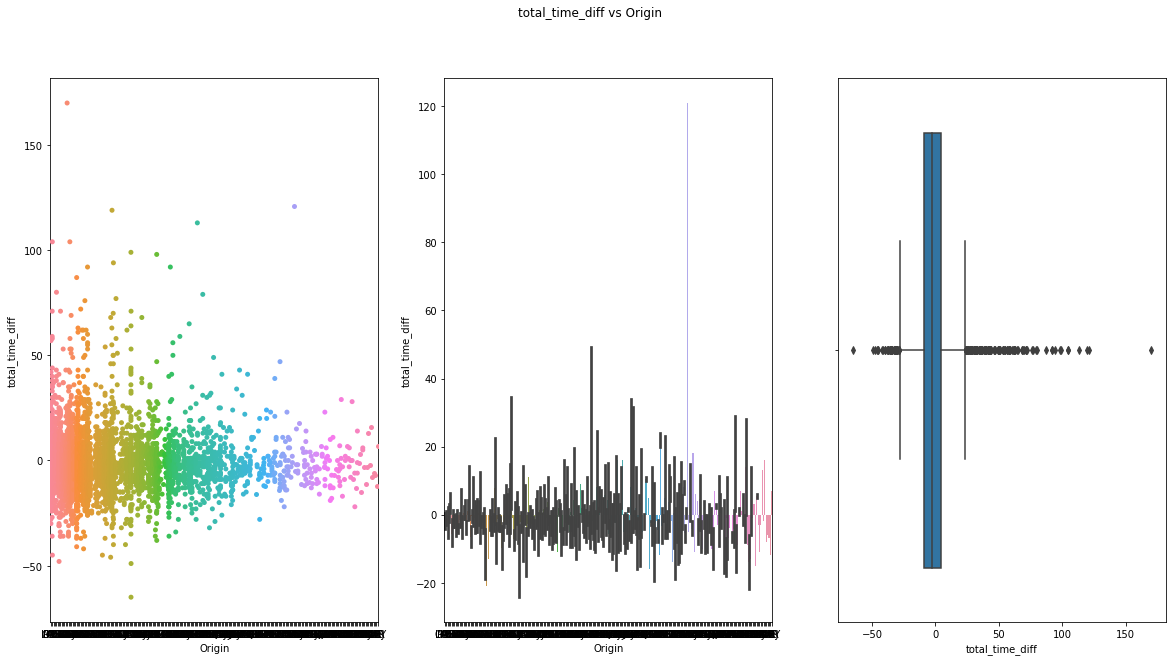

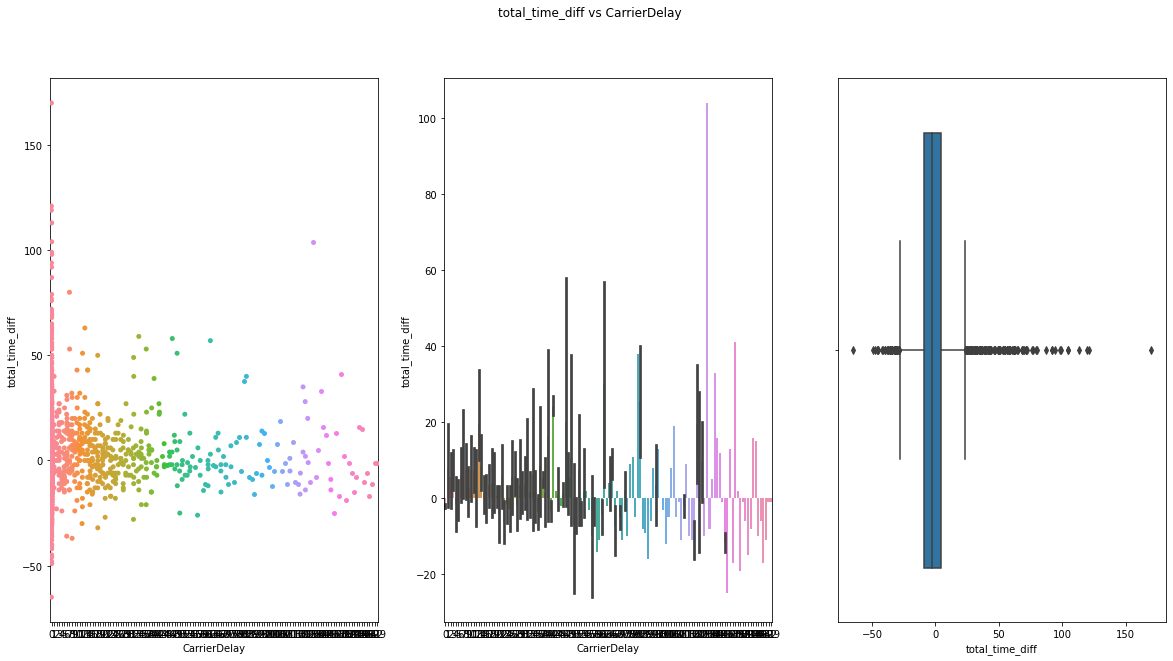

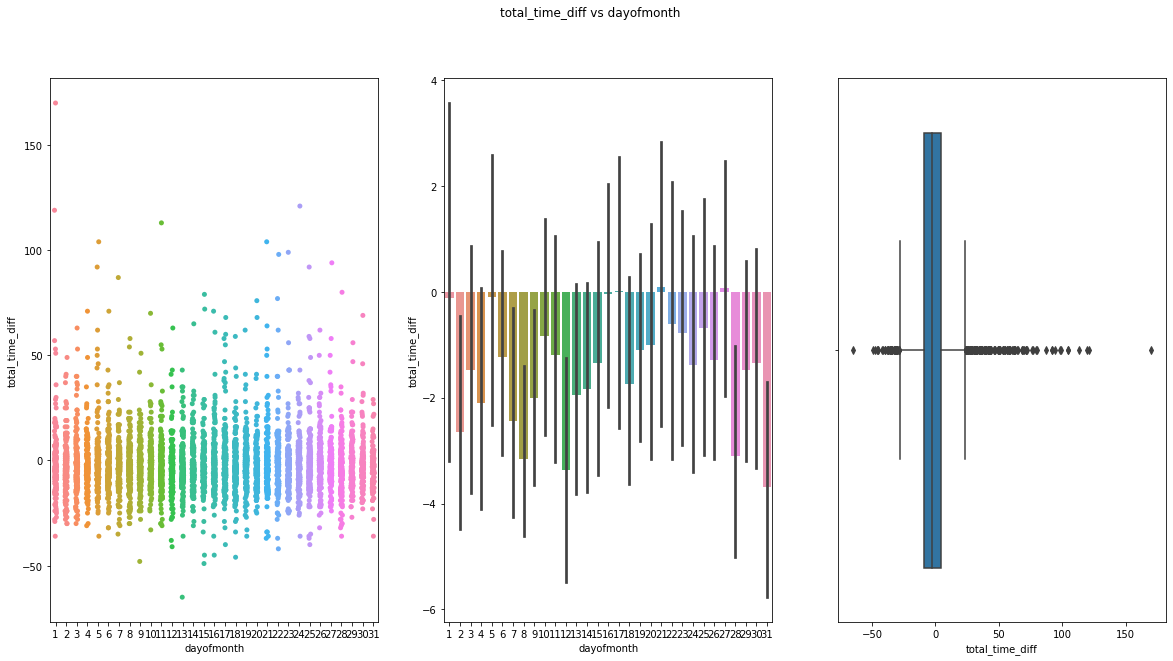

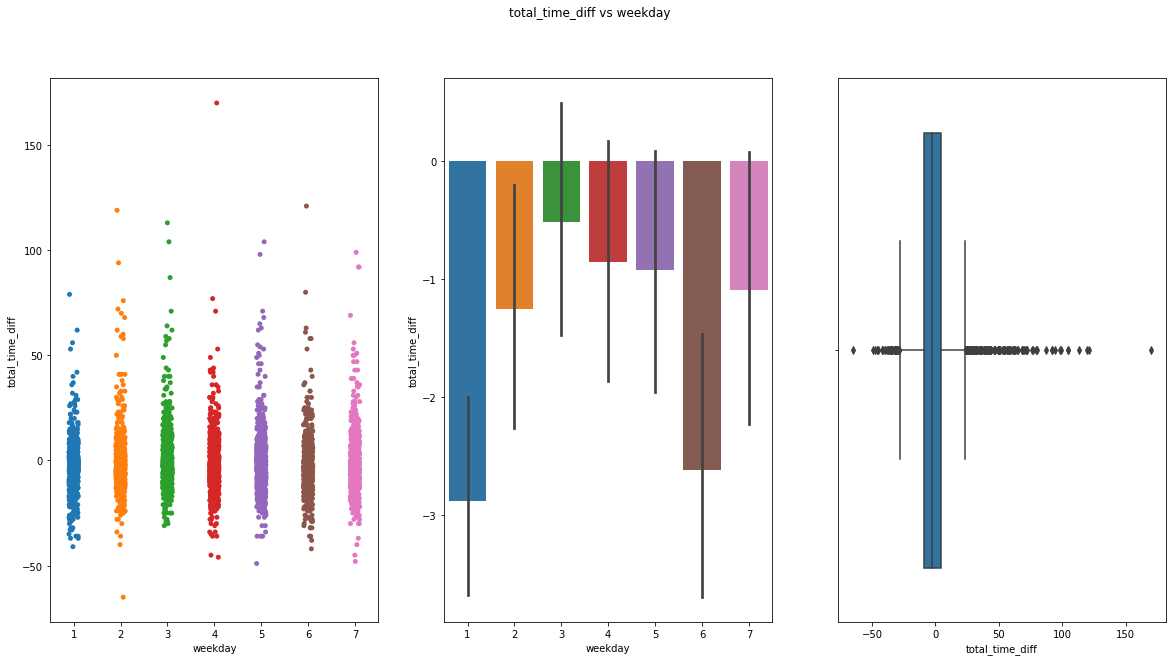

In [ ]:
# Visualizing relationships between cat and cont variables:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

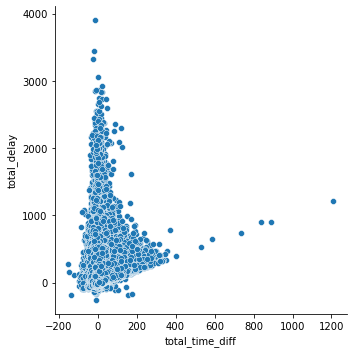

In [ ]:
sns.relplot(x="total_time_diff", y="total_delay", data=train)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 70 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Year                  int64   
 1   Month                 int64   
 2   dayofmonth            int64   
 3   weekday               int64   
 4   depart                int64   
 5   scheduled_depart      int64   
 6   arrive                int64   
 7   scheduled_arrive      int64   
 8   UniqueCarrier         object  
 9   FlightNum             int64   
 10  TailNum               object  
 11  total_time            int64   
 12  scheduled_total_time  int64   
 13  AirTime               int64   
 14  ArrDelay              int64   
 15  DepDelay              int64   
 16  Origin                object  
 17  Dest                  object  
 18  Distance              int64   
 19  TaxiIn                int64   
 20  TaxiOut               int64   
 21  Cancelled             int64   
 22  Diverted          

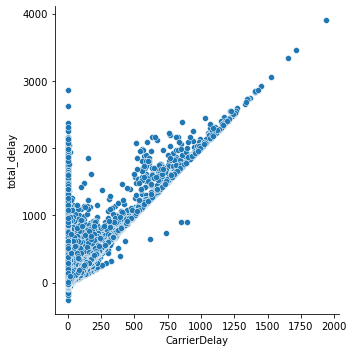

In [ ]:
sns.relplot(x="CarrierDelay", y="total_delay", data=train)
plt.show()

### Exploring Categorical Vars

In [ ]:
# Define function which plots a categorical and continuous var
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(5000)
    plt.figure()
    sns.countplot(x=categorical, data=df_sample)
    plt.figure()
    sns.swarmplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.violinplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

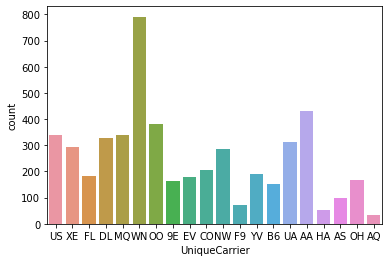

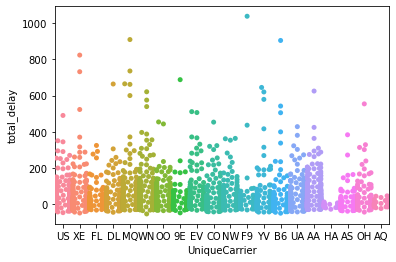

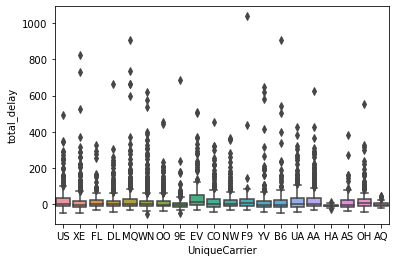

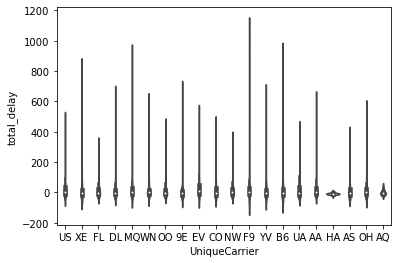

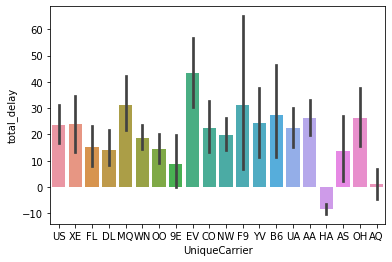

In [ ]:
plot_categorical_and_continuous_vars(train, 'UniqueCarrier', 'total_delay')

In [ ]:
df.CarrierDelay.value_counts()

0       6460366
15        28492
6         26084
7         24544
16        23999
         ...   
803           1
1093          1
977           1
976           1
542           1
Name: CarrierDelay, Length: 1045, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 70 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Year                  int64   
 1   Month                 int64   
 2   dayofmonth            int64   
 3   weekday               int64   
 4   depart                int64   
 5   scheduled_depart      int64   
 6   arrive                int64   
 7   scheduled_arrive      int64   
 8   UniqueCarrier         object  
 9   FlightNum             int64   
 10  TailNum               object  
 11  total_time            int64   
 12  scheduled_total_time  int64   
 13  AirTime               int64   
 14  ArrDelay              int64   
 15  DepDelay              int64   
 16  Origin                object  
 17  Dest                  object  
 18  Distance              int64   
 19  TaxiIn                int64   
 20  TaxiOut               int64   
 21  Cancelled             int64   
 22  Diverted          

### Initial Explore conclusion
- Carrier Delays appear to be greatest of all delays
    - Certain Carriers have more Carrier Delays than others; Carriers with highest delays:
        - JetBlue
        - American Airlines (may be due to number of flights comparatively)
- It seems airlines include extra scheduled flight time
    - Even with small delays, pilots are usually able to make up time in the air
    - Thus: Departure Delays seem to be greater than Arrival Delays
        AND: Even if departure delays occur, flights are, on average, able to diminish this delay by reducing flight time
- The difference in actual total time of a flight and total scheduled time has a negative correlation with weekends and Mondays. Could be cultural/human phenomenon where people move faster because they want to finish the job and get home.
- Despite Southwest conducting the most flights of any carrier, I can be confident in stating that they are able to maintain a average flight delay as good or better than the national carrier average
- 


Variables with which to continue:
- Month
- weekday
- UniqueCarrier
- Origin
- total_time_diff
- total_delay (target var)

# MAIN EXPLORE

## Questions/Hypotheses

1. Do flights in December have higher average flight delays than other months? 
- Ho = December flights avg total_delay <= average annual total_delay
- Ha = December flights avg total_delay > average annual total_delay

2. Do flights on [mondays] have higher average flight delays than other days?
- Ho = [monday] flights avg total_delay <= average annual total_delay
- Ha = [monday] flights avg total_delay > average annual total_delay

3. Does Southwest Airlines have greater flight delays than the national carrier average?
- Ho = Southwest Airlines flights avg total_delay <= average carrier total_delay
- Ha = Southwest Airlines flights avg total_delay > average carrier total_delay

4. Does Detroit airport have greater flight delays than the national airport average?
- Ho = Flights out of Detroit airport avg total_delay <= national average airport total_delay
- Ha = Flights out of Detroit airport avg total_delay > national average airport total_delay

5. Does the difference between a flights' actual total time and a flights' scheduled total time have a relationship to flight delay?
- Ho = More total_time_diff translates to <= total_delay 
- Ha = More total_time_diff translates to > total_delay

### 1. Do flights in December have higher average flight delays than the other months' overall average? 
### August?

- Ho = December flights avg total_delay <= average annual total_delay
- Ha = December flights avg total_delay > average annual total_delay

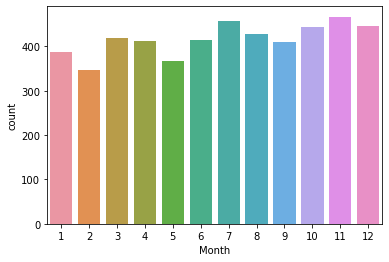

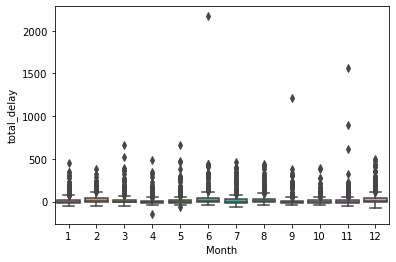

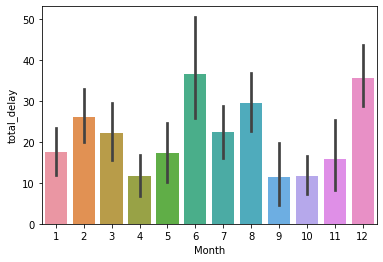

In [ ]:
explore.plot_categorical_and_continuous_vars(train, 'Month', 'total_delay')

In [ ]:
from scipy.stats import levene

alpha = 0.05
# Performing Levene's Test to determine whether variance is equal or not
December = train[train['Month'] == 12].total_delay
overall_mean = train.total_delay

stat,p = levene(December, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 5893.890833992634, p-value: 0.0, alpha: 0.05
We reject Ho


In [ ]:
# Use the scipy stats function one-sample t-test to calculate p-value
December = train[train['Month'] == 12].total_delay

delay_sample = December
overall_mean = train[train['Month'] != 12].groupby(by=['Month']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

    

t-statistic by one-sample t-test: 80.58477959372966, p-value: 0.0, alpha: 0.05
We reject Ho


In [ ]:
# Use the scipy stats function one-sample t-test to calculate p-value
August = train[train['Month'] == 8].total_delay
alpha = 0.05

delay_sample = August
overall_mean = train[train['Month'] != 8].groupby(by=['Month']).total_delay.mean().mean()


t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

    

t-statistic by one-sample t-test: 36.23898056899004, p-value: 4.9499434899979726e-287, alpha: 0.05
We reject Ho


### 2. Do flights on Thursday have higher average flight delays than other days?
- Ho = Thursday flights avg total_delay <= average annual total_delay
- Ha = Thursday flights avg total_delay > average annual total_delay

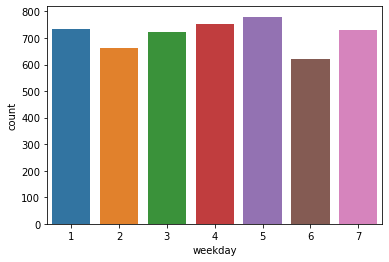

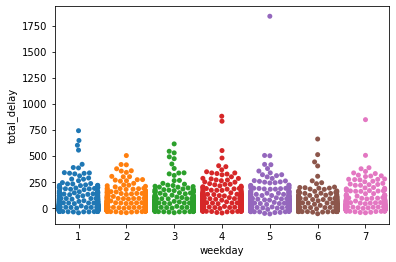

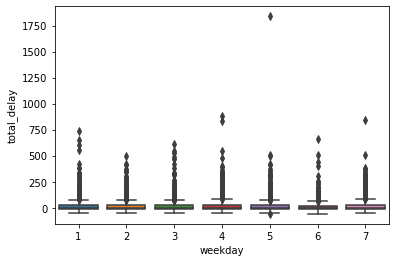

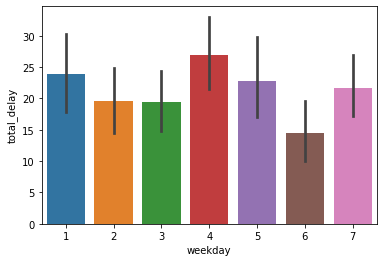

In [ ]:
explore.plot_categorical_and_continuous_vars(train, 'weekday', 'total_delay')

In [ ]:
# Performing Levene's Test to determine whether variance is equal or not
Thursday = train[train['weekday'] == 4].total_delay
overall_mean = train.total_delay

stat,p = levene(December, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 5893.890833992634, p-value: 0.0, alpha: 0.05
We reject Ho


In [ ]:
# Use the scipy stats function one-sample t-test to calculate p-value
Thursday = train[train.weekday == 4].total_delay
alpha = 0.05


delay_sample = Thursday
overall_mean = train[train['weekday'] != 4].groupby(by=['weekday']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

t-statistic by one-sample t-test: 47.28395107366056, p-value: 0.0, alpha: 0.05
We reject Ho


In [ ]:
df.Origin.value_counts()

### 3. Does Southwest Airlines have greater flight delays than the national carrier average?
### JetBlue?
- Ho = Southwest Airlines flights avg total_delay <= average carrier total_delay
- Ha = Southwest Airlines flights avg total_delay > average carrier total_delay

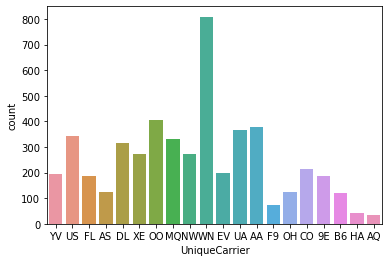

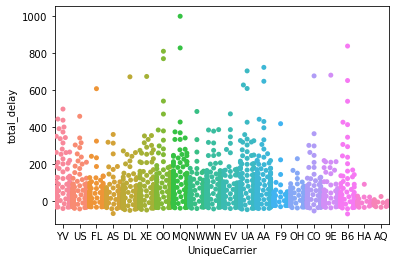

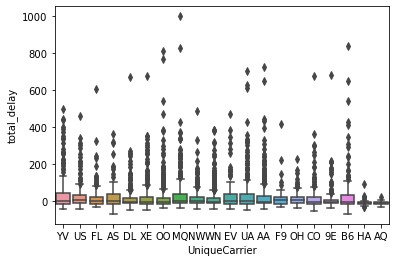

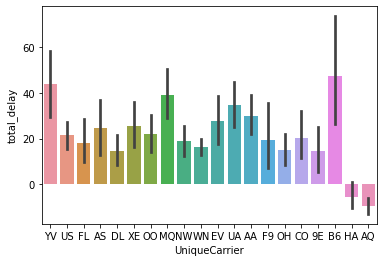

In [ ]:
explore.plot_categorical_and_continuous_vars(train, 'UniqueCarrier', 'total_delay')

In [ ]:
# Performing Levene's Test to determine whether variance is equal or not
JetBlue = train[train['UniqueCarrier'] == 'B6'].total_delay
overall_mean = train.total_delay

stat,p = levene(JetBlue, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 5067.159804328879, p-value: 0.0, alpha: 0.05
We reject Ho


In [ ]:
# Use the scipy stats function one-sample t-test to calculate p-value
Southwest = train[train.UniqueCarrier == 'WN'].total_delay
alpha = 0.05

delay_sample = Southwest
overall_mean = train[train['UniqueCarrier'] != 'WN'].groupby(by=['UniqueCarrier']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

t-statistic by one-sample t-test: -64.23282775996651, p-value: 0.0, alpha: 0.05
We fail to reject Ho


In [ ]:
# Use the scipy stats function one-sample t-test to calculate p-value
JetBlue = train[train.UniqueCarrier == 'B6'].total_delay
alpha = 0.05

delay_sample = JetBlue
overall_mean = train[train['UniqueCarrier'] != 'B6'].groupby(by=['UniqueCarrier']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

t-statistic by one-sample t-test: 30.343452797021186, p-value: 2.2875912358663617e-201, alpha: 0.05
We reject Ho


### 4. Does Detroit airport have greater flight delays than all other airports' average delay?
- Ho = Flights out of Detroit airport avg total_delay <= all other airports' average total_delay
- Ha = Flights out of Detroit airport avg total_delay > all other airports' average total_delay

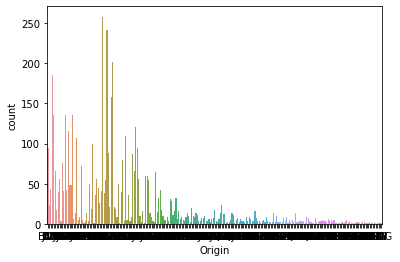

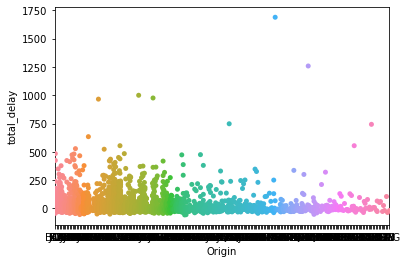

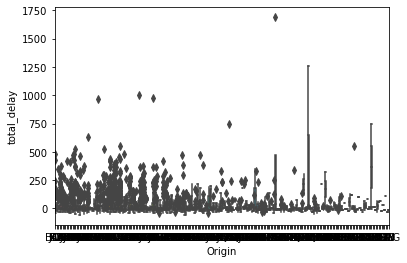

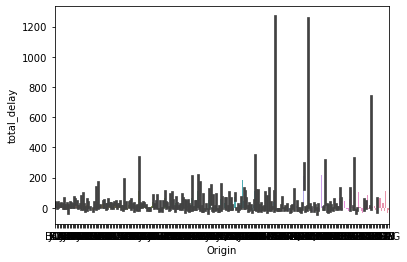

In [ ]:
explore.plot_categorical_and_continuous_vars(train, 'Origin', 'total_delay')

In [ ]:
# Performing Levene's Test to determine whether variance is equal or not
Detroit = train[train.Origin == 'DTW'].total_delay
overall_mean = train.total_delay

stat,p = levene(Detroit, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 214.11242774200724, p-value: 1.745402371147923e-48, alpha: 0.05
We reject Ho


In [ ]:
# Use the scipy stats function one-sample t-test to calculate p-value
Detroit = train[train.Origin == 'DTW'].total_delay
alpha = 0.05

delay_sample = Detroit
overall_mean = train[train['Origin'] != 'DTW'].groupby(by=['Origin']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

t-statistic by one-sample t-test: 17.10281599688487, p-value: 1.7673598340865783e-65, alpha: 0.05
We reject Ho


### 5. Does total_time_diff have a relationship to flight delay?
- Ho = More total_time_diff translates to <= total_delay 
- Ha = More total_time_diff translates to > total_delay

<Figure size 432x288 with 0 Axes>

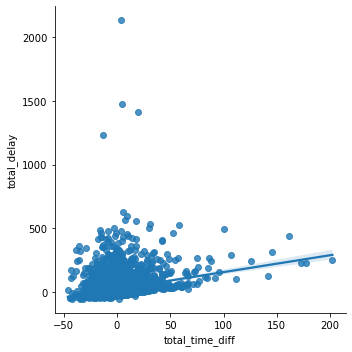

<Figure size 432x288 with 0 Axes>

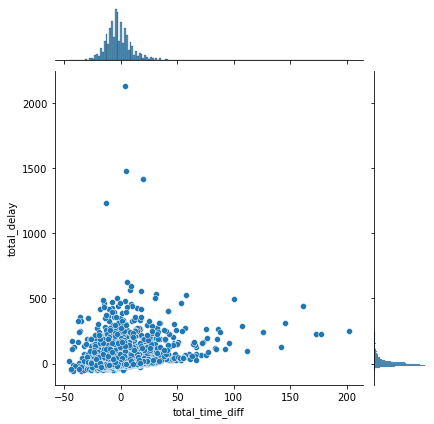

In [ ]:
explore.plot_continuous_and_continuous_vars(train, 'total_time_diff', 'total_delay')

In [ ]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r_sf, p_sf = pearsonr(train['total_time_diff'], train['total_delay'])

r_sf, p_sf

print(f'Correlation Coefficient by Pearson Test: {r_sf}, p-value: {p_sf}')

# set alpha : 0.05
if p_sf < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.23141340329024448, p-value: 0.0
We can reject the null hypothesis


## Explore Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 70 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Year                  int64   
 1   Month                 int64   
 2   dayofmonth            int64   
 3   weekday               int64   
 4   depart                int64   
 5   scheduled_depart      int64   
 6   arrive                int64   
 7   scheduled_arrive      int64   
 8   UniqueCarrier         object  
 9   FlightNum             int64   
 10  TailNum               object  
 11  total_time            int64   
 12  scheduled_total_time  int64   
 13  AirTime               int64   
 14  ArrDelay              int64   
 15  DepDelay              int64   
 16  Origin                object  
 17  Dest                  object  
 18  Distance              int64   
 19  TaxiIn                int64   
 20  TaxiOut               int64   
 21  Cancelled             int64   
 22  Diverted          

# Modeling - Predicting `total_delay` 

In [ ]:
# Dropping Month, UniqueCarrier, and weekday due to previous encoding of these variables
train = train.drop(columns='Month', axis =1)
validate = validate.drop(columns='Month', axis =1)
test = test.drop(columns='Month', axis =1)

train = train.drop(columns='UniqueCarrier', axis =1)
validate = validate.drop(columns='UniqueCarrier', axis =1)
test = test.drop(columns='UniqueCarrier', axis =1)

train = train.drop(columns='weekday', axis =1)
validate = validate.drop(columns='weekday', axis =1)
test = test.drop(columns='weekday', axis =1)



In [ ]:
train = train.drop(columns='Origin', axis =1)
validate = validate.drop(columns='Origin', axis =1)
test = test.drop(columns='Origin', axis =1)

In [ ]:
train.head()

,dayofmonth,depart,scheduled_depart,arrive,scheduled_arrive,total_time,scheduled_total_time,AirTime,Distance,TaxiIn,TaxiOut,total_delay,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
3312646,20,1507,1220,1640,1348,93,88,59,372,5,29,339,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2961834,14,1243,1210,1508,1440,145,150,128,920,5,12,61,-5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4322515,6,1440,1403,1850,1800,190,177,169,1092,7,14,87,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1897002,23,923,920,1055,1050,92,90,76,446,4,12,8,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7078174,17,1904,1800,2221,2122,137,142,110,867,7,20,123,-5,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

#Define function to scale all data based on the train subset
def robust_scale_data(train, validate, test):
    
    scale_columns = ['Distance']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    rbs = RobustScaler()
    
    rbs.fit(train[scale_columns])
    
    train_scaled[scale_columns] = rbs.transform(train[scale_columns])
    validate_scaled[scale_columns] = rbs.transform(validate[scale_columns])
    test_scaled[scale_columns] = rbs.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [ ]:
# Calling our model.py; Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = scale.robust_scale_data(train, validate, test)

In [ ]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF
x_train_scaled = train_scaled.drop(columns=['total_delay'])
x_validate_scaled = validate_scaled.drop(columns=['total_delay'])
x_test_scaled = test_scaled.drop(columns=['total_delay'])

y_train_scaled = train_scaled['total_delay']
y_validate_scaled = validate_scaled['total_delay']
y_test_scaled = test_scaled['total_delay']

In [ ]:
#Establish baselines for the train and validation datasets
baseline = train['total_delay'].mean()

# Create new columns for baseline
train['baseline'] = baseline
validate['baseline'] = baseline
test['baseline'] = baseline

# Find RMSE for each sample
train_rmse = sqrt(mean_squared_error(train['total_delay'], train.baseline))
validate_rmse = sqrt(mean_squared_error(validate['total_delay'], validate.baseline))
test_rmse = sqrt(mean_squared_error(test['total_delay'], test.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))
print('Test baseline RMSE: {}.'.format(test_rmse))

Train baseline RMSE: 73.97018296644863.
Validation baseline RMSE: 74.29186557797719.
Test baseline RMSE: 74.05859989363883.


In [ ]:
x_train_scaled.head()

,dayofmonth,depart,scheduled_depart,arrive,scheduled_arrive,total_time,scheduled_total_time,AirTime,Distance,TaxiIn,TaxiOut,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
3312646,20,1507,1220,1640,1348,93,88,59,-0.316879,5,29,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2961834,14,1243,1210,1508,1440,145,150,128,0.555732,5,12,-5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4322515,6,1440,1403,1850,1800,190,177,169,0.829618,7,14,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1897002,23,923,920,1055,1050,92,90,76,-0.199045,4,12,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7078174,17,1904,1800,2221,2122,137,142,110,0.471338,7,20,-5,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Creating dfs for train and validate predictions
train_predictions = pd.DataFrame({
    'actual': train['total_delay'],
    'baseline': baseline
}) 

predictions = pd.DataFrame({
    'actual': validate['total_delay'],
    'baseline': baseline
}) 

#### Fitting Linear Regression

In [ ]:
# Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predicting on train and validate and adding column to both predictions dfs 
train_predictions['simple_lm'] = lm.predict(x_train_scaled)
predictions['simple_lm'] = lm.predict(x_validate_scaled)

#### Fitting Lasso-Lars Regression

In [ ]:
# Create the model object
lars = LassoLars(alpha=1)

# Fit the model to our training data
lars.fit(x_train_scaled, y_train_scaled)

# predict train
train_predictions['lasso_lars'] = lars.predict(x_train_scaled)

# Predict validate
predictions['lasso_lars'] = lars.predict(x_validate_scaled)

#### Fitting TweediRegressor

In [ ]:
# Create the model object
glm = TweedieRegressor(power=0, alpha=1)

# Fit the model to our training data
glm.fit(x_train_scaled, y_train_scaled)

# predict train, add to df
train_predictions['glm'] = glm.predict(x_train_scaled)

# Predict validate, add to df
predictions['glm'] = glm.predict(x_validate_scaled)

#### Evaluating Models using root mean squared error (RMSE)

In [ ]:
# Calculate root mean squared error (RMSE) for every column in the train_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(train_predictions.actual, y_predicted))

print('Train baseline RMSE: {}.'.format(train_rmse))
train_predictions.apply(calculate_rmse).sort_values()

Train baseline RMSE: 73.97018296644863.


actual         0.000000
simple_lm     67.511929
glm           68.698877
baseline      73.970183
lasso_lars    73.970183
dtype: float64

In [ ]:
# Calculate root mean squared error (RMSE) for every column in the predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions.actual, y_predicted))

print('Validation baseline RMSE: {}.'.format(validate_rmse))
predictions.apply(calculate_rmse).sort_values()

Validation baseline RMSE: 74.29186557797719.


actual         0.000000
simple_lm     67.950122
glm           69.119541
baseline      74.291866
lasso_lars    74.291866
dtype: float64

### Predict and Evaluate Test dataset
Like with train and validate, I'll create a predictions df to collect predictions and then evaluate.

In [ ]:
test_predictions = pd.DataFrame({
    'actual': test['total_delay'],
    'baseline': baseline
}) 

In [ ]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predict on test
test_predictions['simple_lm'] = lm.predict(x_test_scaled)

test_predictions.head()

,actual,baseline,simple_lm
1949761,-30,21.516436,-2.415426
6855023,69,21.516436,65.013864
3193222,3,21.516436,36.521975
4269503,-13,21.516436,31.191714
5812076,-10,21.516436,3.027917


In [ ]:
# Calculate root mean squared error (RMSE) for the test_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(test_predictions.actual, y_predicted))

print('Test baseline RMSE: {}.'.format(test_rmse))
test_predictions.apply(calculate_rmse).sort_values()

Test baseline RMSE: 74.05859989363883.


actual        0.000000
simple_lm    67.606355
baseline     74.058600
dtype: float64

In [ ]:
test_result = test_predictions.apply(calculate_rmse).sort_values()

In [ ]:
# Finding by how much my model beat baseline 
model_percent = abs((test_result['simple_lm'] - test_rmse) / ((test_result['simple_lm'] + test_rmse) / 2))

print("The model beat baseline by: "+"{:.2%}".format(model_percent))

The model beat baseline by: 9.11%
